In [19]:
try:
    import yfinance as yf
except:
    !pip install yfinance
    
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
ticks = "AAPL"
df = yf.download(ticks)

[*********************100%***********************]  1 of 1 completed


In [21]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099584,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094388,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087461,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089625,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092224,73449600
...,...,...,...,...,...,...
2023-06-16,186.729996,186.990005,184.270004,184.919998,184.919998,101235600
2023-06-20,184.410004,186.100006,184.410004,185.009995,185.009995,49799100
2023-06-21,184.899994,185.410004,182.589996,183.960007,183.960007,49515700


In [22]:
df.info()     

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10722 entries, 1980-12-12 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10722 non-null  float64
 1   High       10722 non-null  float64
 2   Low        10722 non-null  float64
 3   Close      10722 non-null  float64
 4   Adj Close  10722 non-null  float64
 5   Volume     10722 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 586.4 KB


Text(0.5, 1.0, 'Correlation Matrix')

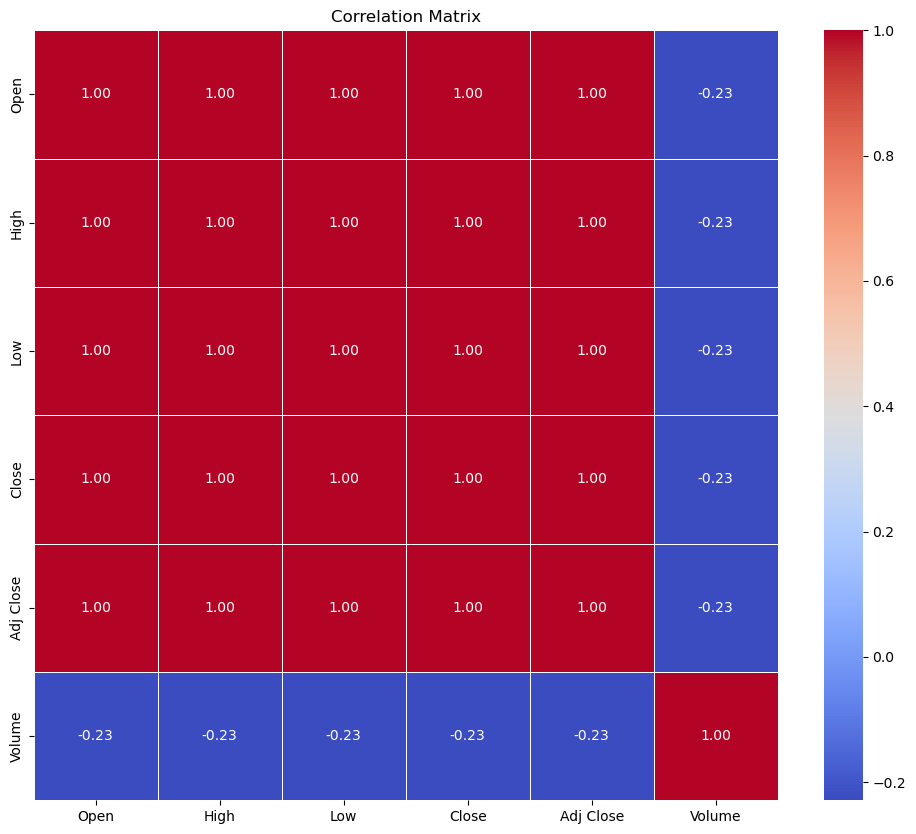

In [23]:
variables = df.columns
data = df[variables]
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

In [24]:
df.drop("Adj Close",axis=1,inplace=True)

In [25]:
df

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600
...,...,...,...,...,...
2023-06-16,186.729996,186.990005,184.270004,184.919998,101235600
2023-06-20,184.410004,186.100006,184.410004,185.009995,49799100
2023-06-21,184.899994,185.410004,182.589996,183.960007,49515700


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df.drop("Close",axis=1)
y = df.Close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.9999525484608721


Text(0.5, 1.0, 'Hata Dağılımı')

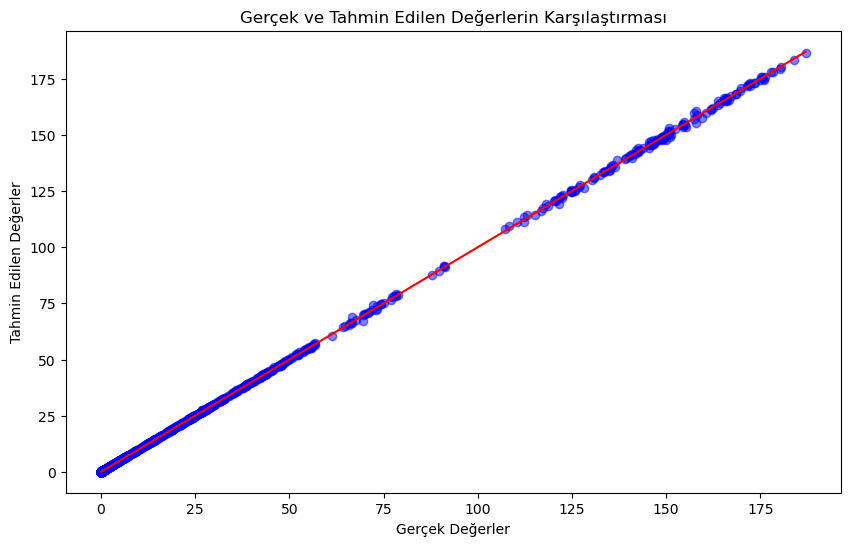

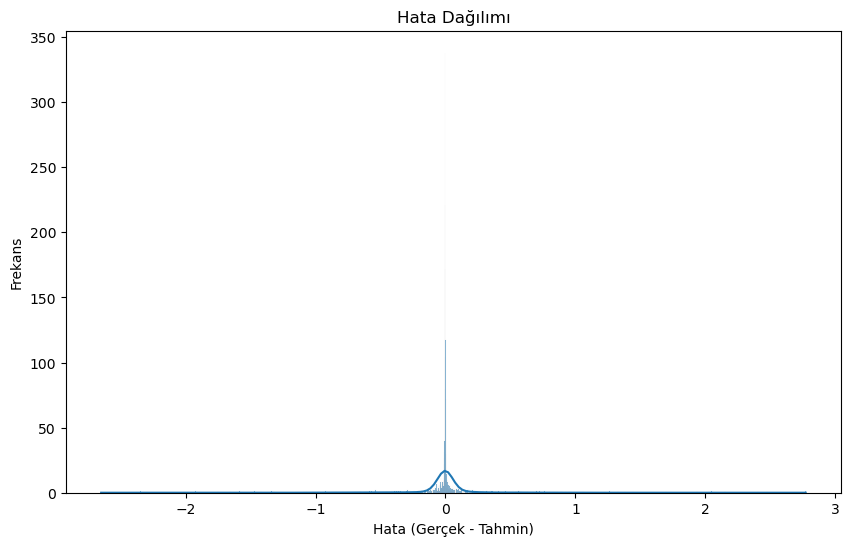

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5) 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r') 
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Değerlerin Karşılaştırması')

plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel('Hata (Gerçek - Tahmin)')
plt.ylabel('Frekans')
plt.title('Hata Dağılımı')